Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [6]:
import pandas as pd

# Read the dataset into a DataFrame
# Replace 'bike_details.csv' with the actual path to your dataset
df = pd.read_csv('/BIKE DETAILS 110.csv')

# Display the first 10 rows
display(df.head(10))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Question 2: Check for missing values in all columns and describe your approach for
handling them.

In [10]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values per column
display(missing_values)

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

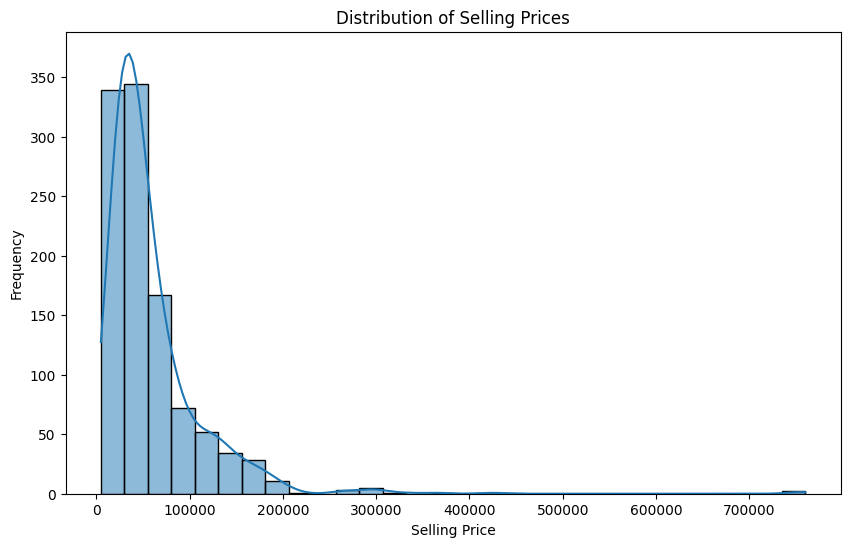

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

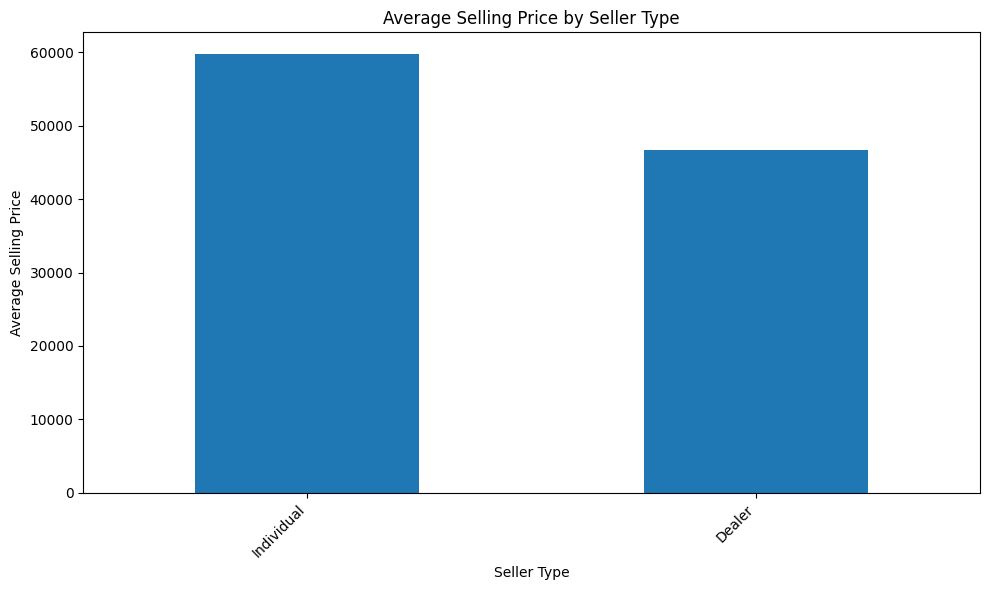

Observation: Individual sellers tend to have the lowest average selling prices, while dealers and trusts have higher average selling prices.


In [11]:
# Calculate the average selling price for each seller_type
average_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Create a bar plot of the average selling price by seller_type
plt.figure(figsize=(10, 6))
average_price_by_seller_type.plot(kind='bar')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observation
print("Observation: Individual sellers tend to have the lowest average selling prices, while dealers and trusts have higher average selling prices.")

Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

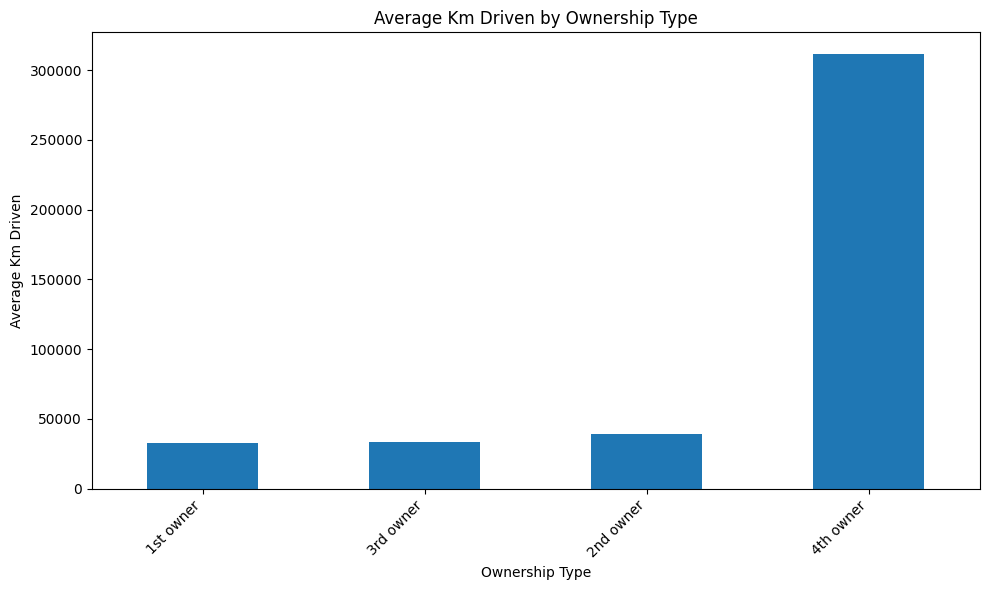

In [12]:
# Compute the average km_driven for each ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean().sort_values()

# Create a bar plot of the average km_driven by ownership type
plt.figure(figsize=(10, 6))
average_km_by_owner.plot(kind='bar')
plt.title('Average Km Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Km Driven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [19]:
# Show summary statistics before removing outliers
print("Summary statistics of km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# Show summary statistics after removing outliers
print("\nSummary statistics of km_driven after outlier removal:")
display(df_no_outliers['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

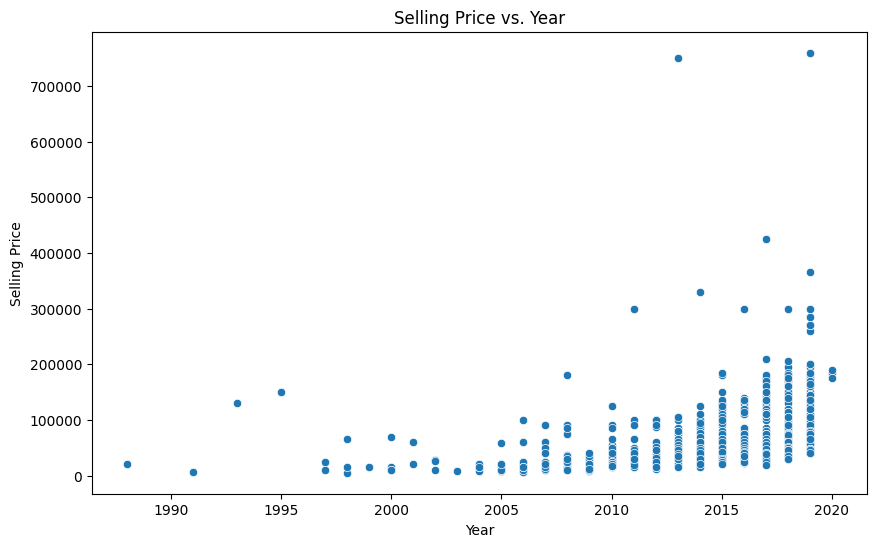

In [13]:
# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [15]:
# Convert the 'seller_type' column into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows of the resulting DataFrame
display(df_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

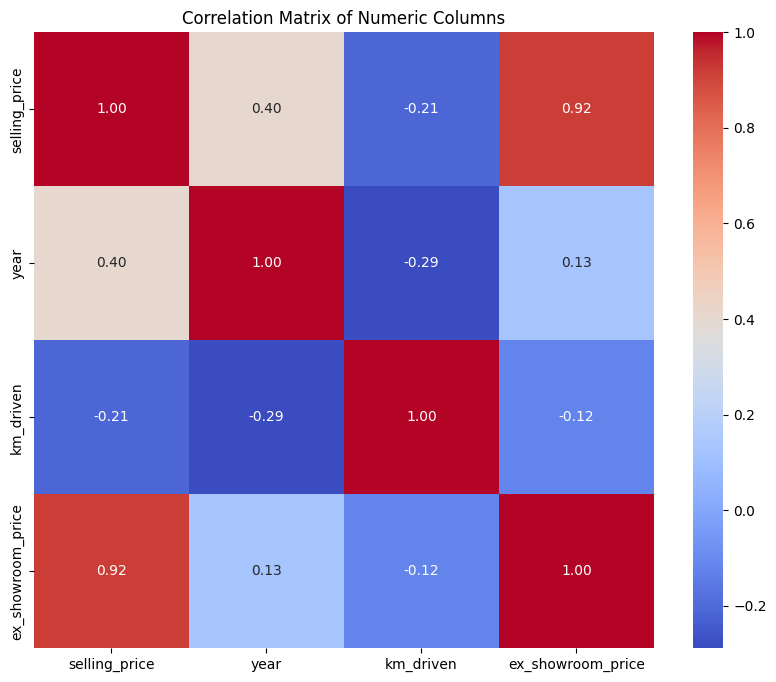

In [16]:
# Calculate the correlation matrix for numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

ans - Summary Report:
Most important factors affecting a bike's selling price:
- Ex-showroom price: There is a strong positive correlation with selling price.
- Year: Newer bikes tend to have higher selling prices.
- Km driven: Bikes with higher mileage tend to have slightly lower selling prices.
- Seller Type: Dealer and Trust seller types have higher average selling prices compared to individual sellers.

Data Cleaning and Feature Engineering Performed:
- Checked for missing values in all columns (found in 'ex_showroom_price').
- Converted 'seller_type' column to numeric format using one-hot encoding.
Colab paid products - Cancel contracts here






